In [2]:
setwd('/import/DB/minidir//a.fel/BJTC-204')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
load('/import/DB/minidir/a.fel/mdd.rna/GSE101521.rda')
count = expr3
dim(expr3)
rownames(count) = count[,1]
count = count[,-1]
cli = cli %>% dplyr::filter(V4 =='Male')

[1] 33714    60

In [5]:
library(dplyr)
cli$V2 = gsub('MDD-S','MDD',cli$V2) 
table(cli$V2)
rownames(cli) = cli[,1]
con.sample = cli %>%  dplyr::filter(V2 =='CON') %>% rownames()
MDD.sample = cli %>%  dplyr::filter(V2 =='MDD') %>% rownames()
control = count[,con.sample]
MDD = count[,MDD.sample]


CON MDD 
 23  19 

In [6]:
MDD.sample

[1] "V35" "V36" "V37" "V40" "V45" "V47" "V15" "V16" "V18" "V20" "V23" "V24"
[13] "V26" "V31" "V38" "V41" "V50" "V51" "V56"

In [7]:
load('testset2.groups.rda')

In [8]:
dim(all1)

[1] 19  2

In [9]:
head(all1,2)

,sample,group
,<chr>,<chr>
1,V35,subtype1
2,V36,subtype1


In [10]:
group = all1

In [11]:
head(count,2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,77.659131,83.61358,91.08093,90.7157146,80.921931,74.51847,80.914252,94.8571629,60.46899,162.053160,...,83.839471,67.079353,100.308934,85.53492,88.737914,76.449341,74.573695,88.92313,96.6075637,76.847992
TNMD,1.493445,0.00000,0.00000,0.8478104,1.445034,0.00000,1.571151,0.8865155,1.20938,4.209173,...,1.746656,1.992456,0.964509,0.00000,3.059928,1.927294,1.193179,3.70513,0.8782506,1.787163


In [12]:
coun = count[,group$sample]

rownames(group) = group[,1]

library(dplyr)

group = group %>%tibble::remove_rownames() %>%   tibble::column_to_rownames(.,'sample')

In [13]:
group.all1 = group

In [14]:
load('bulk2.tpm.rda')
coun = tpm[,rownames(group)]

In [15]:
fpkm = coun

In [16]:
dataExpr = fpkm

In [17]:
library(WGCNA)
library(reshape2)
library(stringr)
options(stringsAsFactors = FALSE)
enableWGCNAThreads()
#exprMat <- "./fpkm.txt"
type = "unsigned"
corType = "pearson"
corFnc = ifelse(corType=="pearson", cor, bicor)
maxPOutliers = ifelse(corType=="pearson",1,0.05)
robustY = ifelse(corType=="pearson",T,F)

Warning message:
"package 'WGCNA' was built under R version 4.2.3"
Loading required package: dynamicTreeCut

Warning message:
"package 'dynamicTreeCut' was built under R version 4.2.3"
Loading required package: fastcluster

Warning message:
"package 'fastcluster' was built under R version 4.2.3"

Attaching package: 'fastcluster'


The following object is masked from 'package:stats':

    hclust





Attaching package: 'WGCNA'


The following object is masked from 'package:stats':

    cor


Warning message:
"package 'reshape2' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"


Allowing parallel execution with up to 255 working processes.


In [18]:
m.mad <- apply(dataExpr,1,mad)
dataExprVar <- dataExpr[which(m.mad > 
                 max(quantile(m.mad, probs=seq(0, 1, 0.25))[2],0.01)),]

dataExpr <- as.data.frame(t(dataExprVar))
gsg = goodSamplesGenes(dataExpr, verbose = 3)

 Flagging genes and samples with too many missing values...
  ..step 1


In [19]:
if (!gsg$allOK){
  # Optionally, print the gene and sample names that were removed:
  if (sum(!gsg$goodGenes)>0) 
    printFlush(paste("Removing genes:", 
                     paste(names(dataExpr)[!gsg$goodGenes], collapse = ",")));
  if (sum(!gsg$goodSamples)>0) 
    printFlush(paste("Removing samples:", 
                     paste(rownames(dataExpr)[!gsg$goodSamples], collapse = ",")));
  # Remove the offending genes and samples from the data:
  dataExpr = dataExpr[gsg$goodSamples, gsg$goodGenes]
}


In [20]:
nGenes = ncol(dataExpr)
nSamples = nrow(dataExpr)
dim(dataExpr)

[1]    19 20608

In [21]:
sampleTree = hclust(dist(dataExpr), method = "average")
pdf('./figure2/res9/wgcna1.pdf',width = 6,height = 5)
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")
dev.off()

png 
  2

In [22]:
clust = cutreeStatic(sampleTree, cutHeight = 90000, minSize = 10)
table(clust)
# clust 1 contains the samples we want to keep.
keepSamples = (clust==1)

clust
 1 
19 

In [23]:
dataExpr = dataExpr[keepSamples, ]

In [24]:
group1 = group %>%  dplyr::filter(rownames(.) %in%  rownames(dataExpr))

In [25]:
group = group1

In [26]:
powers = c(c(1:10), seq(from = 12, to=30, by=2))
sft = pickSoftThreshold(dataExpr, powerVector=powers, 
                        networkType=type, verbose=5)

pickSoftThreshold: will use block size 2170.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2170 of 20608
   ..working on genes 2171 through 4340 of 20608
   ..working on genes 4341 through 6510 of 20608
   ..working on genes 6511 through 8680 of 20608
   ..working on genes 8681 through 10850 of 20608
   ..working on genes 10851 through 13020 of 20608
   ..working on genes 13021 through 15190 of 20608
   ..working on genes 15191 through 17360 of 20608
   ..working on genes 17361 through 19530 of 20608
   ..working on genes 19531 through 20608 of 20608
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.203  1.730          0.723 5950.00  6110.000   8430
2      2    0.132  0.456          0.778 2570.00  2610.000   4510
3      3    0.187 -0.455          0.803 1350.00  1310.000   3030
4      4    0.511 -0.908          0.892  799.00   731.000   2240
5      5    0.647 -1.170          0.930  511.00   436.000   1750
6 

In [27]:
options(repr.plot.width = 9)

In [28]:
par(mfrow = c(1,2))
cex1 = 0.8
pdf('./figure2/res9/wgcna2.pdf',width = 5,height = 5)
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",
     ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"))
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red")
abline(h=0.8,col="red")
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, 
     cex=cex1, col="red")
dev.off()

png 
  2

In [29]:
power = sft$powerEstimate
power

[1] 10

In [30]:
if (is.na(power)){
  power = ifelse(nSamples<20, ifelse(type == "unsigned", 9, 18),
          ifelse(nSamples<30, ifelse(type == "unsigned", 8, 16),
          ifelse(nSamples<40, ifelse(type == "unsigned", 7, 14),
          ifelse(type == "unsigned", 6, 12))       
          )
          )
}

In [31]:
exprMat='data.txt'

In [32]:
net = blockwiseModules(dataExpr, power = power, maxBlockSize = nGenes,
                       TOMType = type, minModuleSize = 40,
                       reassignThreshold = 0, mergeCutHeight = 0.45,
                       numericLabels = TRUE, pamRespectsDendro = FALSE,
                       saveTOMs=TRUE, corType = corType, 
                       maxPOutliers=maxPOutliers, loadTOMs=TRUE,
                       saveTOMFileBase = paste0(exprMat, ".tom"),
                       verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 128 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file data.txt.tom-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 1 genes from module 1 because their KME is too low.
     ..removing 1 genes from module 2 because their KME is too low.
     ..removing 1 genes from module 3 because their KME is too low.
     ..removing 2 genes from module 7 because their KME is too low.
     ..removing 5 genes from module 10 because their KME is too low.
     ..removing 2 genes from module 18 because their KME is too low.
     ..removing 1 genes from module 19 becau

In [33]:
moduleLabels = net$colors
moduleColors = labels2colors(moduleLabels)
pdf('./figure2/res9/wgcna3.pdf',width = 6,height = 5)
plotDendroAndColors(net$dendrograms[[1]], moduleColors[net$blockGenes[[1]]],
                    "Module colors",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
dev.off()

png 
  2

In [34]:
MEs = net$MEs
MEs_col = MEs
colnames(MEs_col) = paste0("ME", labels2colors(
  as.numeric(str_replace_all(colnames(MEs),"ME",""))))
MEs_col = orderMEs(MEs_col)

In [35]:
pdf('./figure2/res9/wgcna4.pdf',width = 6,height = 5)
plotEigengeneNetworks(MEs_col, "Eigengene adjacency heatmap", 
                      marDendro = c(3,3,2,4),
                      marHeatmap = c(3,4,2,2), plotDendrograms = T, 
                      xLabelsAngle = 90)
dev.off()

png 
  2

In [36]:
TOM = TOMsimilarityFromExpr(dataExpr, power=power, corType=corType, networkType=type)

TOM calculation: adjacency..
..will use 128 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [37]:
group.all1 = group

In [38]:
design <- model.matrix(~0 + group.all1$group)

In [39]:
dimnames(design) <- list(rownames(group.all1), sort(unique(group.all1$group)))

In [40]:
design <- design[rownames(MEs_col),]

In [41]:
modTraitCor <- cor(MEs_col, design, use = "p")
modTraitP <- corPvalueStudent(modTraitCor, dim(group.all1)[1])

In [42]:
modTraitCorP = bicorAndPvalue(MEs_col, design)
modTraitCor = modTraitCorP$bicor
modTraitP   = modTraitCorP$p

Warning message in bicor(x, y, use = use, ...):
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


In [43]:
options(repr.plot.width = 6,repr.plot.height = 6)

In [44]:
textMatrix <- paste0(signif(modTraitCor, 2), "\n(", signif(modTraitP, 1), ")")
dim(textMatrix) <- dim(modTraitCor)
pdf('./figure2/res9/wgcna5.pdf',width = 6,height = 6)
labeledHeatmap(
  Matrix = modTraitCor,
  xLabels = colnames(design),
  yLabels = colnames(MEs_col),
  cex.lab = 1.2,
  ySymbols = colnames(MEs_col),
  colorLabels = FALSE,
  colors = blueWhiteRed(50),
  textMatrix = textMatrix,
  setStdMargins = FALSE,
  cex.text = 1.2,
  zlim = c(-1, 1),
  main = paste("Module-trait relationships")
)
dev.off()

png 
  2

In [45]:
dat = dataExpr

In [46]:
nSamples <- nrow(dat)
modNames <- substring(colnames(MEs_col), 3) 
geneModuleMembership <- as.data.frame(cor(dat, MEs, use = "p")) 
MMPvalue <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples)) 
names(geneModuleMembership) <- paste("MM", modNames, sep="")
names(MMPvalue) <- paste("p.MM", modNames, sep="")
geneTraitSignificance <- as.data.frame(cor(dat, design, use = "p")) 

In [47]:
GSPvalue <- as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples))
names(geneTraitSignificance) <- paste("GS.", colnames(design), sep="")
names(GSPvalue) <- paste("p.GS.", colnames(design), sep="")

In [48]:
modNames

[1] "blue"      "green"     "yellow"    "brown"     "turquoise" "red"      
[7] "grey"

In [49]:
module <- "turquoise"
column <- match(module, modNames)  
brown_moduleGenes <- names(net$colors)[which(moduleColors == module)]
MM <- abs(geneModuleMembership[brown_moduleGenes, column])
GS <- abs(geneTraitSignificance[brown_moduleGenes, 1])

In [50]:
options(repr.plot.width = 6,repr.plot.height = 5)

In [51]:
# verboseScatterplot(
#   MM, GS,
#   xlab = paste("Module Membership in", module, "module"),
#   ylab = "Gene significance for proliferating",
#   main = paste("Module membership vs. gene significance\n"),
#   abline = TRUE,
#   pch = 21,
#   cex.main = 1.2,
#   cex.lab = 1.2,
#   cex.axis = 1.2,
#   col = "black",
#   bg = module
# )

In [52]:
pdf('./figure2/res9/wgcna7.pdf',width = 6,height = 5)
verboseScatterplot(MM, GS,
                   xlab = paste("Module Membership in", module, "module"),
                   ylab = "Gene significance for Subtype1",
                   main = paste("Module membership vs. gene significance\n"),
                   cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2, col = module)
abline(h=0.4,v=0.8,col="red",lwd=1.5)
dev.off()

png 
  2

In [53]:
brown_hub <- brown_moduleGenes[(GS > 0.4 & MM > 0.8)]
length(brown_hub)

[1] 804

In [54]:
write.csv(brown_hub,'brown_hub_gene.csv')

In [55]:
library(clusterProfiler)
library(org.Hs.eg.db)
options(stringsAsFactors = F)
 
brown_hub_gene <- read.csv('brown_hub_gene.csv',header = F)
brown_hub_gene <- brown_hub_gene[-1,]
brown_hub_gene <- brown_hub_gene[,-1]
gene=unique(brown_hub_gene)
sig_DP_entrezId <- mapIds(x = org.Hs.eg.db,
                             keys = gene,
                             keytype = "SYMBOL",
                             column = "ENTREZID")


Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfil

In [56]:
table(is.na(sig_DP_entrezId))


FALSE 
  804 

In [57]:

sig_DP_entrezId <- na.omit(sig_DP_entrezId)
go_bp <- enrichGO(gene = sig_DP_entrezId,
                      OrgDb = org.Hs.eg.db,
                      keyType = "ENTREZID",
                      ont = "ALL",
                      pvalueCutoff = 0.05,
                      qvalueCutoff = 1,
                      readable = TRUE)


In [58]:
head(go_bp@result,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0016570,BP,GO:0016570,histone modification,47/698,474/18903,7.992231e-10,3.636465e-06,3.336546e-06,NFYA/JARID2/AASS/MBTD1/BRCA1/ZZZ3/ARID4B/USP36/KMT2C/HDAC7/HDAC4/KDM5A/BAZ2A/KAT6A/REST/MECOM/EP300/BRD1/KAT2B/HDAC1/PHF19/KANSL1/HAT1/TAF4/RRP8/CDC73/USP3/BRD4/SETDB1/TAF1/FLCN/ELK4/PAXBP1/LMNA/DTX3L/NIPBL/ASXL1/ZNF274/PHF8/KDM2A/GATA2/EHMT1/EP400/UTY/PCGF3/PHF2/RBM14,47
GO:0006338,BP,GO:0006338,chromatin remodeling,34/698,373/18903,1.282998e-06,2.772957e-03,2.544257e-03,JARID2/HDAC4/KDM5A/BAZ2A/KAT6A/MECOM/EP300/BICRAL/KAT2B/INO80D/HDAC1/TTF2/ARID1A/DNMT3A/BAZ2B/HP1BP3/HAT1/PHF10/CHD1L/RRP8/DPF2/BRD4/RERE/SETDB1/ZNF827/GATAD1/LMNA/BPTF/PHF8/SMARCC1/CHD2/EP400/ARID2/PHF2,34


Warning message:
"package 'DOSE' was built under R version 4.2.2"
DOSE v3.24.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




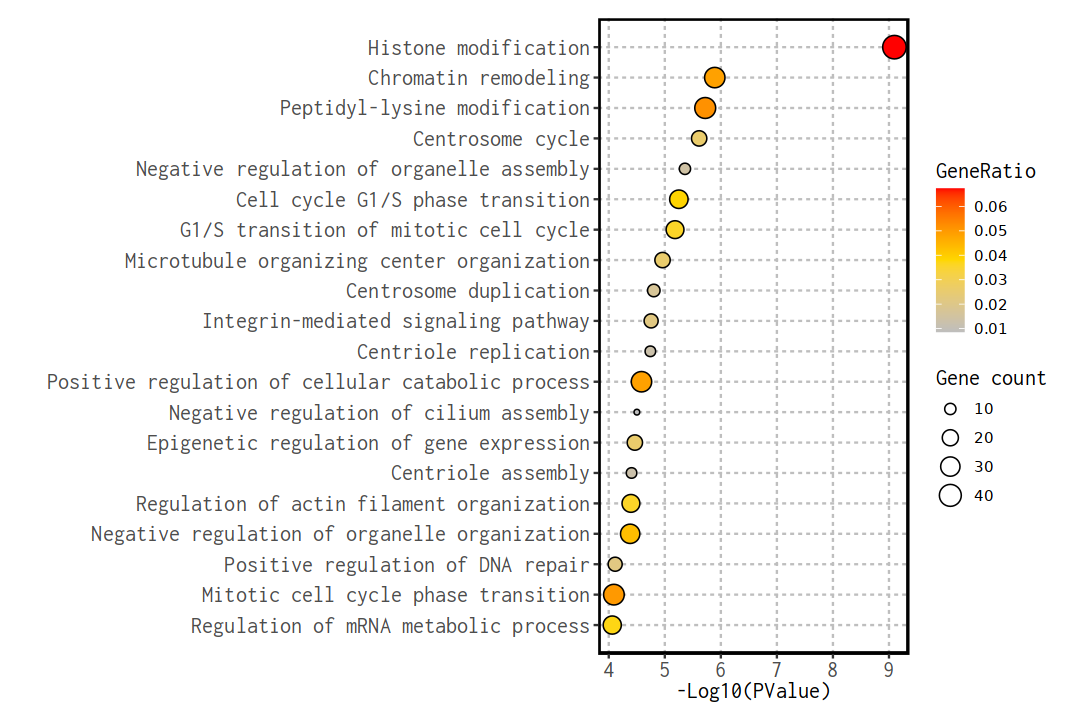

In [59]:
df = go_bp@result[1:20,]
library(ggplot2)
library(DOSE)
options(repr.plot.width = 9,repr.plot.height = 6)
df$GeneRatio <- parse_ratio(df$GeneRatio)
 dotplot = ggplot(cbind(df, Order = nrow(df):1)) +
    geom_point(mapping = aes(x = -log10(pvalue), y = Order, 
                             size = Count, fill = GeneRatio),
               shape = 21) + 
    scale_fill_gradientn(colours = c("grey", "gold", "red")) + 
    scale_y_continuous(position = "left", 
                       breaks = 1:nrow(df), 
                       labels = Hmisc::capitalize(rev(df$Description))) +
    #scale_x_continuous(breaks = c(3, 4,5,6),
    #                   #breaks = seq(0, xmax+5, 5),
    #                   limits = c(3,6),
    #                   expand = expansion(mult = c(.05, .05))) +
    labs(x = "-Log10(PValue)", y = NULL) +
    guides(size = guide_legend(title = "Gene count"),
           fill = guide_colorbar(title = "GeneRatio")) +
    #  ggtitle(title) +
    theme_bw() +
    theme(panel.grid =element_blank(),
          panel.grid.major = element_line(color = "gray", linetype = "dashed"),
          panel.border = element_rect(color = "black", linewidth = 1),
          axis.text = element_text(size = 13, family = 'Times'),
          title = element_text(size = 13, family = 'Times')) 
  dotplot %>% ggplotGrob() %>% cowplot::plot_grid() + theme_classic()
ggsave('./figure2/res9/wgcna8-GO.pdf',width = 9,height = 5)

In [60]:
options(repr.plot.width = 7,repr.plot.height = 5)

In [61]:
library(enrichplot)

Warning message:
"package 'enrichplot' was built under R version 4.2.2"


In [62]:
ek <- enrichKEGG(gene =sig_DP_entrezId , 
                   organism = "hsa",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 
    keggres = ek@result
    #write.csv(keggres,file = 'kegg_results.csv')

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



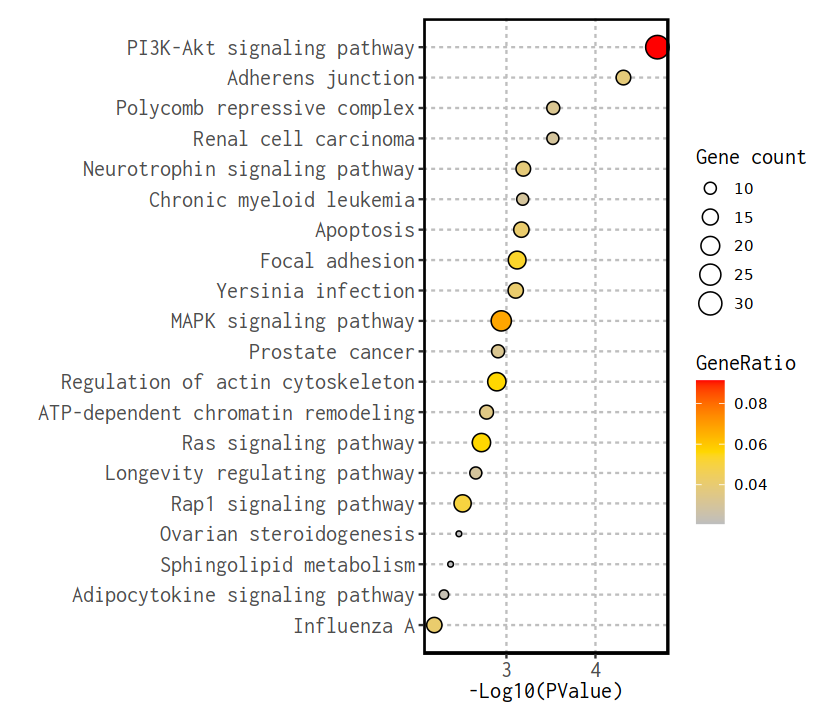

In [63]:
df = ek@result[1:20,]
library(ggplot2)
library(DOSE)
options(repr.plot.width = 7,repr.plot.height = 6)
df$GeneRatio <- parse_ratio(df$GeneRatio)
 dotplot = ggplot(cbind(df, Order = nrow(df):1)) +
    geom_point(mapping = aes(x = -log10(pvalue), y = Order, 
                             size = Count, fill = GeneRatio),
               shape = 21) + 
    scale_fill_gradientn(colours = c("grey", "gold", "red")) + #
    scale_y_continuous(position = "left", 
                       breaks = 1:nrow(df), 
                       labels = Hmisc::capitalize(rev(df$Description))) +
    #scale_x_continuous(breaks = c(3, 4,5,6),
    #                   #breaks = seq(0, xmax+5, 5),
    #                   limits = c(3,6),
    #                   expand = expansion(mult = c(.05, .05))) + 
    labs(x = "-Log10(PValue)", y = NULL) +
    guides(size = guide_legend(title = "Gene count"),
           fill = guide_colorbar(title = "GeneRatio")) +
    #  ggtitle(title) +
    theme_bw() +
    theme(panel.grid =element_blank(),
          panel.grid.major = element_line(color = "gray", linetype = "dashed"),
          panel.border = element_rect(color = "black", linewidth = 1),
          axis.text = element_text(size = 13, family = 'Times'),
          title = element_text(size = 13, family = 'Times')) 
  dotplot %>% ggplotGrob() %>% cowplot::plot_grid() + theme_classic()
ggsave('./figure2/res9/wgcna8-KEGG.pdf',width = 7,height = 5)